In [144]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud

In [145]:
import pandas as pd
import numpy as np

df = pd.read_csv("response.csv")
df.head()

,Timestamp,I-1. What's your full name?,I-2. Which library are you enrolled in?,I-3. When did you join our mentor program?,I-4. What grade are you in?,I-5. What is your date of birth?,"I-6. Do you have access to the essential resources needed for your studies, such as textbooks and the internet?",I-7. What are the main obstacles or challenges that have prevented you from continuing or completing your education?,I-8. What is your current family status?,I-9. How would you rate the level of support you receive from your family?,...,III-3. Have your English writing skills improved since joining the mentor program?,III-4. Have your English reading skills improved since joining the mentor program?,III-5. What part of English do you need to work on more?,(Optional) Is there anything else you would like us to know?,"IV-1. Do you ever feel like you need someone to talk to, but don’t know who to talk to?",IV-2. Have you ever felt so sad or lonely that you wanted to hurt yourself? What do you need right now that you don’t have?,IV-3. How can I help you going forward?,IV-4. What’s the biggest problem that you’re facing right now?,"Pass Rate for Subjects Last Year""",Age
0,2023-09-01 10:07:11,Andy Twumasi,"Adeiso, Ghana",2023-05-15,8,2008-06-13,Yes,Financial Constraints: Lack of money to buy fo...,both parents,3,...,4,4,Speaking,How we will get solution to the subject we fin...,Yes,I don't have a laptop so I need a laptop to im...,By helping me get study materials,Laptop to learn,1.00,16
1,2023-09-01 10:13:39,Addo Gloria Otabil,"Adeiso, Ghana",2022-08-15,8,2006-06-17,No,"Lack of School Materials: Books, uniforms, sch...",both parents,2,...,4,4,Speaking,NaN,No,No,By helping me to study hard by providing me wi...,I don't have textbooks and computer to study,0.01,18
2,2023-09-01 10:25:52,Francisca Konadu,"Adeiso, Ghana",2022-05-15,8,2009-11-21,No,Financial Constraints: Lack of money to buy fo...,grandparents or other relatives,3,...,4,4,Speaking,No,Yes,I need textbooks and a computer to study,You help me by supporting me to improve on my ...,Money to buy food sometimes at school,0.01,14
3,2023-09-01 10:50:38,Pearl Aboah,"Adeiso, Ghana",2022-05-15,8,2009-07-04,No,Financial Constraints: Lack of money to buy fo...,both parents,3,...,5,5,Speaking,"Yes.When I am given an assignment,I find it di...",No,Books,Improve my academic,Lack of financial support.,0.00,15
4,2023-09-07 09:37:54,Carren Jahenda,"Maragoli, Kenya",2023-07-26,3,2013-12-02,No,Financial Constraints: Lack of money to buy fo...,"one parent (due to death, divorce, separation)",2,...,3,3,Speaking,I intend to work hard and achieve my dreams an...,Yes,Our house is spoilt by bad weather and my mum ...,Help me work hard to achieve my dreams.,Our family financial problem.,0.01,10


In [146]:
df.columns

Index(['Timestamp', 'I-1. What's your full name?',
       'I-2. Which library are you enrolled in?',
       'I-3. When did you join our mentor program?',
       'I-4. What grade are you in?', 'I-5. What is your date of birth?',
       'I-6. Do you have access to the essential resources needed for your studies, such as textbooks and the internet?',
       'I-7. What are the main obstacles or challenges that have prevented you from continuing or completing your education?',
       'I-8. What is your current family status?',
       'I-9. How would you rate the level of support you receive from your family?',
       'I-10. What subjects do you enjoy most and why?',
       'II-1. Have you advanced to the next grade level in school within the last year?',
       'II-2. How do you feel since joining the mentor program?',
       'II-4. How many subjects do you have in school in the last year?',
       'II-5. How many subjects have you passed in the last year?',
       'II-6. How many of your s

In [147]:
new_columns = ['timestamp', "fullname", "library", "time_joined", "grade", "DOB", "access_to_resources", "obstacles",
              "family_status", "support_level", "fav_subjects", "to_next_grade", "feelings", "subjects_had", "subjects_passed",
              "subject_improved", "eng_speaking", "eng_listening", "eng_writing", "eng_reading", "eng_worst_aspect", "others",
              "feel_like_talking", "feeling_sad", "help_needed", "biggest_problem", "pass_rate", "age"]

df = df.set_axis(new_columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            225 non-null    object 
 1   fullname             225 non-null    object 
 2   library              225 non-null    object 
 3   time_joined          225 non-null    object 
 4   grade                225 non-null    int64  
 5   DOB                  225 non-null    object 
 6   access_to_resources  225 non-null    object 
 7   obstacles            225 non-null    object 
 8   family_status        225 non-null    object 
 9   support_level        225 non-null    int64  
 10  fav_subjects         225 non-null    object 
 11  to_next_grade        225 non-null    object 
 12  feelings             225 non-null    int64  
 13  subjects_had         225 non-null    int64  
 14  subjects_passed      225 non-null    int64  
 15  subject_improved     225 non-null    int

In [148]:
obstacles = df.obstacles.apply(lambda x: x.split(":")[0])
obstacles_value_counts = obstacles.value_counts()
obstacles_value_counts

obstacles
Financial Constraints                      125
Lack of School Materials                    31
Distance from School                        22
Family Responsibilities                     12
Lack of Technology Access                   10
Health and Nutrition Issues                  9
Family and Cultural Barriers                 8
Insufficient Educational Infrastructure      6
Safety concerns                              2
Name: count, dtype: int64

[Text(0, 0, '125'),
 Text(0, 0, '31'),
 Text(0, 0, '22'),
 Text(0, 0, '12'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '2')]

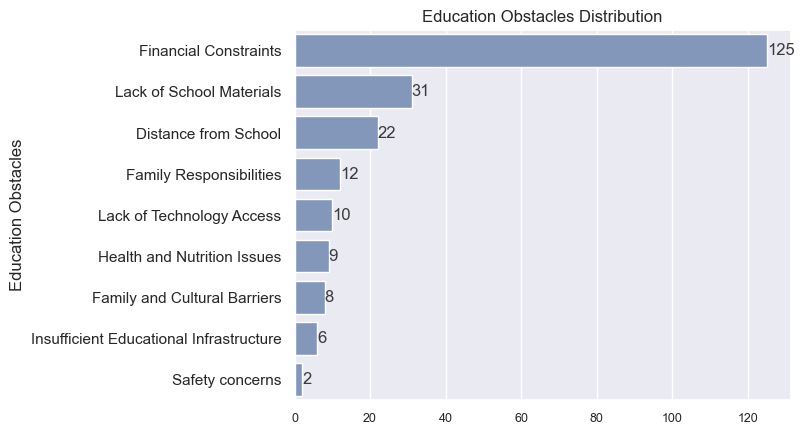

In [149]:
title = "Education Obstacles"

sns.set_theme(style="darkgrid")
plt.figure()
plt.xticks(fontsize=9)
ax = sns.barplot(x=obstacles_value_counts.values, y = obstacles_value_counts.index, color="#7A95C4", orient = 'h')
ax.set_title(f"{title} Distribution")
ax.set_ylabel(title)
ax.bar_label(container=ax.containers[0], labels=obstacles_value_counts.values, color="#3b3b3b")

In [150]:
import nltk
from nltk.tokenize import word_tokenize
import spacy

In [151]:
nlp = spacy.load('en_core_web_sm') 
  
sentence = "English, Agriculture, Science , Expressive Arts, Life Skills, Social Studies and Chichewa. They are enjoyable and very proficient to my career goals."
  
doc = nlp(sentence) 

print(doc.ents)
for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 

(English, Agriculture, Science , Expressive Arts, Social Studies, Chichewa)
English 0 7 LANGUAGE
Agriculture, Science , Expressive Arts 9 47 ORG
Social Studies 62 76 ORG
Chichewa 81 89 PERSON


In [152]:
s2 = "Mathematics,biology,science,geography he wants to be a police man "

In [153]:
text = word_tokenize(sentence)
nltk.pos_tag(text)

[('English', 'JJ'),
 (',', ','),
 ('Agriculture', 'NNP'),
 (',', ','),
 ('Science', 'NNP'),
 (',', ','),
 ('Expressive', 'NNP'),
 ('Arts', 'NNP'),
 (',', ','),
 ('Life', 'NNP'),
 ('Skills', 'NNP'),
 (',', ','),
 ('Social', 'NNP'),
 ('Studies', 'NNPS'),
 ('and', 'CC'),
 ('Chichewa', 'NNP'),
 ('.', '.'),
 ('They', 'PRP'),
 ('are', 'VBP'),
 ('enjoyable', 'JJ'),
 ('and', 'CC'),
 ('very', 'RB'),
 ('proficient', 'JJ'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('career', 'NN'),
 ('goals', 'NNS'),
 ('.', '.')]

In [154]:
text = word_tokenize(s2)
nltk.pos_tag(text)

[('Mathematics', 'NNS'),
 (',', ','),
 ('biology', 'NN'),
 (',', ','),
 ('science', 'NN'),
 (',', ','),
 ('geography', 'NN'),
 ('he', 'PRP'),
 ('wants', 'VBZ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('police', 'NN'),
 ('man', 'NN')]

In [155]:
s3 = "English, Science, Agriculture, Social Studies, Life Skills, Expressive Arts, Religious Education and Chichewa."
text = word_tokenize(s3)
nltk.pos_tag(text)

[('English', 'JJ'),
 (',', ','),
 ('Science', 'NNP'),
 (',', ','),
 ('Agriculture', 'NNP'),
 (',', ','),
 ('Social', 'NNP'),
 ('Studies', 'NNPS'),
 (',', ','),
 ('Life', 'NNP'),
 ('Skills', 'NNP'),
 (',', ','),
 ('Expressive', 'NNP'),
 ('Arts', 'NNP'),
 (',', ','),
 ('Religious', 'NNP'),
 ('Education', 'NNP'),
 ('and', 'CC'),
 ('Chichewa', 'NNP'),
 ('.', '.')]

In [156]:
def get_subjects_and_goals(s):
    #print(s)
    text = word_tokenize(s)
    tags = nltk.pos_tag(text)
    # get the indexes of all nouns
    indices = [i for i, tag in enumerate(tags) if tag[1].startswith("NN") or tag[0].lower() in ["english", "spanish", "chichewa"]]
    instructions = build_instructions(indices)
    subjects, goal = [], ""
    for inst in instructions:
        if not inst[2]:
            subject_tags = tags[inst[0]:inst[1]+1]
            subject = " ".join([tag[0] for tag in subject_tags]).title() # get subjects with each word capitalized
            subjects.append(subject)
        else:
            goal_tags = tags[inst[0]:inst[1]+1]
            goal = " ".join([tag[0] for tag in goal_tags]).title()
    return {"subjects":subjects, "goal": goal}

def build_instructions(indices):
    last_idx = indices[0]
    begin_idx = indices[0]
    end_idx = indices[0]
    is_goal = False
    instructions = []
    curr_instruction = (begin_idx, end_idx, is_goal)
    for j, i in enumerate(indices[1:]):
        dist = i - end_idx
        if dist == 1:
            end_idx = i
            if j == len(indices)-2:
                if begin_idx - last_idx == 1:
                    curr_instruction = (begin_idx, end_idx, False)
                elif begin_idx - last_idx > 1:
                    curr_instruction = (begin_idx, end_idx, True)
                instructions.append(curr_instruction)
        elif dist == 2:
            if j < len(indices)-2:
                curr_instruction = (begin_idx, end_idx, False)
                last_idx = end_idx
                begin_idx = indices[j+1]
                end_idx = indices[j+1]
                instructions.append(curr_instruction)
            else:
                if begin_idx - last_idx == 1:
                    curr_instruction = (begin_idx, end_idx, is_goal)
                elif begin_idx - last_idx > 1:
                    curr_instruction = (begin_idx, end_idx, True)
                instructions.append(curr_instruction)
        elif dist > 2:
            curr_instruction = (begin_idx, end_idx, False)
            last_idx = end_idx
            begin_idx = indices[j+1]
            end_idx = indices[j+1]
            instructions.append(curr_instruction)
            is_goal = True
    return instructions

In [157]:
fav_subjects_dicts = df.fav_subjects.apply(lambda x: get_subjects_and_goals(x))
df_fav_subjects = pd.DataFrame.from_records(fav_subjects_dicts)
df_fav_subjects.head()

,subjects,goal
0,[Science],
1,[],
2,"[Science, Science]",
3,"[Science, World]",
4,[Mathematics],


In [158]:
fav_subjects = [subject for subjects in df_fav_subjects.subjects for subject in subjects]
goals = [goal for goal in df_fav_subjects.goal]

In [159]:
subjects_value_counts = pd.Series(fav_subjects).value_counts()
subjects_value_counts

English           79
Mathematics       49
Science           30
Biology           24
Maths             23
                  ..
Art                1
Home Economics     1
History            1
To                 1
It                 1
Name: count, Length: 73, dtype: int64

In [160]:
subjects_stats = subjects_value_counts[:40]

In [161]:
goals_value_counts = pd.Series(goals).value_counts()
goals_value_counts

                                    162
Social Studies                        4
Chemistry                             4
Christian Religious Education         3
Lot                                   3
Life Skills                           3
Mathematics                           2
English                               2
Geography                             2
Chichewa                              2
Police Man                            2
Agriculture                           1
Speaking                              1
Primary Science                       1
Bible Knowledge                       1
Bank Manager                          1
Body Organ                            1
Science                               1
Way                                   1
Body Functioning                      1
Dream Career                          1
Kiswahili                             1
Home Science                          1
To Do Accounts                        1
It Is More Fun                        1


In [162]:
drop_labels = ["I", "Ict", "Skills", "Support", "Dream", "Career I", "People", "Subject", "Part", "How", "Challenging",
              "Goal"]
overlap_labels = ["English", "Math", "Science", "Arts"]
subjects_stats = subjects_stats.drop(labels=drop_labels)

In [163]:
subjects_stats = subjects_stats.drop(labels=["Subjects", "Studies"])
subjects_stats

English                     79
Mathematics                 49
Science                     30
Biology                     24
Maths                       23
Physics                     17
Chemistry                   17
Geography                   11
Agriculture                  9
Social Studies               9
Chichewa                     6
Math                         5
Life Skills                  4
Technology                   4
Music                        3
Education                    2
English Mathematics          2
Arts                         2
Kiswahili                    2
Social                       2
Expressive Arts              2
Everything                   1
Mathematics Because This     1
Mathematics English          1
Primary Science              1
English Science              1
Name: count, dtype: int64

In [164]:
subjects_stats

English                     79
Mathematics                 49
Science                     30
Biology                     24
Maths                       23
Physics                     17
Chemistry                   17
Geography                   11
Agriculture                  9
Social Studies               9
Chichewa                     6
Math                         5
Life Skills                  4
Technology                   4
Music                        3
Education                    2
English Mathematics          2
Arts                         2
Kiswahili                    2
Social                       2
Expressive Arts              2
Everything                   1
Mathematics Because This     1
Mathematics English          1
Primary Science              1
English Science              1
Name: count, dtype: int64

In [166]:
subjects_stats_associated_idx = {}

for l in overlap_labels:
    ass_l = []
    for idx in subjects_stats.index:
        if idx.startswith(l) or (l in idx.split(" ")):
            ass_l.append(idx)
    if l == "Math":
        l = "Mathematics"
    subjects_stats_associated_idx[l] = ass_l

keys = subjects_stats_associated_idx.keys()
index = list(keys)
value = []

for i in keys:
    value.append(subjects_stats[i])

def in_associated_idx(idx):
    for j, i in enumerate(keys):
        if idx in subjects_stats_associated_idx[i]:
            return j+1
    return 0
    
for idx in subjects_stats.index:
    associated_idx = in_associated_idx(idx)
    if associated_idx:
        value[associated_idx-1] += subjects_stats[idx]
    else:
        index.append(idx)
        value.append(subjects_stats[idx])

index.append("Christian Religious Education")
value.append(3)

subjects_value_counts = pd.Series(value, index=index)
subjects_value_counts = subjects_value_counts.sort_values(ascending=False)
subjects_value_counts

English                          162
Mathematics                      127
Science                           61
Biology                           24
Physics                           17
Chemistry                         17
Geography                         11
Agriculture                        9
Social Studies                     9
Arts                               6
Chichewa                           6
Life Skills                        4
Technology                         4
Music                              3
Christian Religious Education      3
Education                          2
Kiswahili                          2
Social                             2
Everything                         1
dtype: int64

In [177]:
sum_subjects = sum(subjects_value_counts.values)
count_percentage = [round(round(p, 4)*100, 2) for p in subjects_value_counts.values/sum_subjects]
count_percentage

[34.47,
 27.02,
 12.98,
 5.11,
 3.62,
 3.62,
 2.34,
 1.91,
 1.91,
 1.28,
 1.28,
 0.85,
 0.85,
 0.64,
 0.64,
 0.43,
 0.43,
 0.43,
 0.21]

In [178]:
df_fav_subjects = pd.DataFrame({"subject":subjects_value_counts.index, "percentage":count_percentage})
df_fav_subjects.to_csv("fav_subjects_counts.csv", index=False)

[Text(0, 0, '162'),
 Text(0, 0, '127'),
 Text(0, 0, '61'),
 Text(0, 0, '24'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

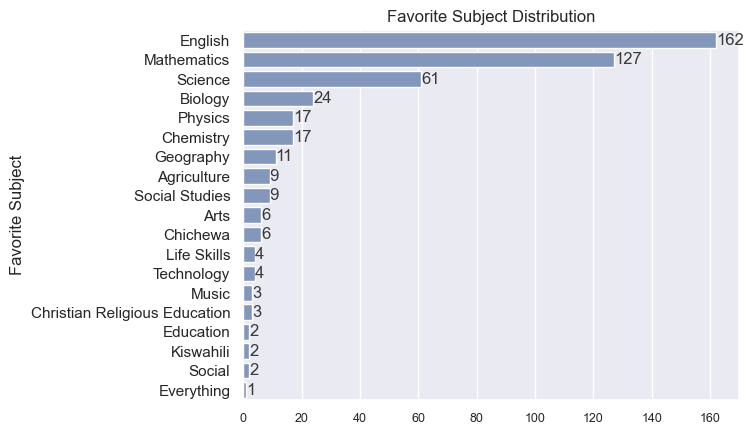

In [23]:
title = "Favorite Subject"

sns.set_theme(style="darkgrid")
plt.figure()
plt.xticks(fontsize=9)
ax = sns.barplot(x=subjects_value_counts.values, y = subjects_value_counts.index, color="#7A95C4", orient = 'h')
ax.set_title(f"{title} Distribution")
ax.set_ylabel(title)
ax.bar_label(container=ax.containers[0], labels=subjects_value_counts.values, color="#3b3b3b")

In [24]:
goals_drop_labels = ["Social Studies", "Chemistry", "Christian Religious Education", "Lot", "Mathematics", "English", "Geography", 
               "Chichewa", "Agriculture", "Speaking", "Primary Science", "Bible Knowledge", "Science", "Body Organ",
              "Way", "Kiswahili", "Speaking", "Skills", "Physics", "Religious Education", "Teachers", "It"]
goals_value_counts = goals_value_counts.drop(labels=goals_drop_labels)
goals_value_counts.index

Index(['', 'Life Skills', 'Police Man', 'Bank Manager', 'Body Functioning',
       'Dream Career', 'Home Science', 'To Do Accounts', 'It Is More Fun',
       'About Reading And Answering', 'The World', 'Mathematics Teacher',
       'Word', 'Career Goals', 'Accounting Skills', 'Peaceful', 'English Help',
       'Craft', 'To Develop My Technology Skills',
       'A Historian And An Agriculturist', 'A Doctor', 'To Become An Engineer',
       'An Accountant', 'Iwant To Become A Doctor', 'Be Librarian',
       'To Become An Ict Technician'],
      dtype='object')

In [25]:
goals_value_counts = goals_value_counts.drop("")
goals_value_counts.index

Index(['Life Skills', 'Police Man', 'Bank Manager', 'Body Functioning',
       'Dream Career', 'Home Science', 'To Do Accounts', 'It Is More Fun',
       'About Reading And Answering', 'The World', 'Mathematics Teacher',
       'Word', 'Career Goals', 'Accounting Skills', 'Peaceful', 'English Help',
       'Craft', 'To Develop My Technology Skills',
       'A Historian And An Agriculturist', 'A Doctor', 'To Become An Engineer',
       'An Accountant', 'Iwant To Become A Doctor', 'Be Librarian',
       'To Become An Ict Technician'],
      dtype='object')

In [26]:
goals = ", ".join(list(goals_value_counts.index))

In [27]:
delete_words = ["Career", "Become", "Be", "Iwant", "And", "An ", "A ", "Dream", "To", "Do ", "It", "Is", 
                "Develop", "My", "About", "Goals", "Word"]
connect_words = [("Bank", "Manager"), ("Body", "Functioning"), ("Home", "Science"), ("The", "World"), ("Mathematics", "Teacher"),
                 ("Ict", "Technician"), ("Police", "Man"), ("Accounting", "Skills"), ("Technology", "Skills"), ("Life", "Skills")
                 , ("English", "Help")]

for word in delete_words:
    goals = goals.replace(word, '')

In [28]:
for word_pair in connect_words:
    goals = goals.replace(f"{word_pair[0]} {word_pair[1]}", f"{word_pair[0]}_{word_pair[1]}")

In [29]:
goals

'Life_Skills, Police_Man, Bank_Manager, Body_Functioning,  , Home_Science,  Accounts,   More Fun,  Reading  Answering, The_World, Mathematics_Teacher, ,  , Accounting_Skills, Peaceful, English_Help, Craft,    Technology_Skills, Historian  Agriculturist, Doctor,   Engineer, Accountant,    Doctor,  Librarian,   Ict_Technician'

(-0.5, 1199.5, 799.5, -0.5)

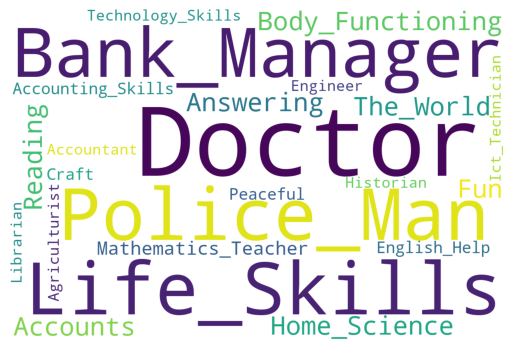

In [30]:
wc = WordCloud(background_color='white', max_words=200, width=1200, height = 800).generate(goals)
plt.imshow(wc)
plt.axis("off")

In [31]:
wc.to_file("career_goals.png")

In [32]:
df.columns

Index(['timestamp', 'fullname', 'library', 'time_joined', 'grade', 'DOB',
       'access_to_resources', 'obstacles', 'family_status', 'support_level',
       'fav_subjects', 'to_next_grade', 'feelings', 'subjects_had',
       'subjects_passed', 'subject_improved', 'eng_speaking', 'eng_listening',
       'eng_writing', 'eng_reading', 'eng_worst_aspect', 'others',
       'feel_like_talking', 'feeling_sad', 'help_needed', 'biggest_problem',
       'pass_rate', 'age'],
      dtype='object')

# Sentence Clustering & Topic Modeling for text answers

For the following prompts:

(Optional) Is there anything else you would like us to know?

IV-1. Do you ever feel like you need someone to talk to, but don’t know who to talk to?

IV-2. Have you ever felt so sad or lonely that you wanted to hurt yourself? What do you need right now that you don’t have?

IV-3. How can I help you going forward?

IV-4. What’s the biggest problem that you’re facing right now?

# LSI / LDA

In [33]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel

In [34]:
# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [35]:
def get_col_topic(colname, num_topics, num_words_for_topic):
    clean_corpus = [clean(doc).split() for doc in df[colname] if doc == doc]
    dictionary = corpora.Dictionary(clean_corpus)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]
    lsa = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
    print("LSA\n")
    print(lsa.print_topics(num_topics=num_topics, num_words=num_words_for_topic))
    lda = LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
    print("\nLDA")
    print(lda.print_topics(num_topics=num_topics, num_words=num_words_for_topic))

In [36]:
colname = 'biggest_problem'
get_col_topic(colname, num_topics=20, num_words_for_topic=2)

LSA

[(0, '0.720*"school" + 0.563*"fee"'), (1, '-0.766*"lack" + -0.327*"material"'), (2, '-0.659*"problem" + -0.252*"facing"'), (3, '0.468*"back" + 0.430*"home"'), (4, '-0.485*"material" + -0.318*"cant"'), (5, '0.393*"cant" + 0.378*"parent"'), (6, '0.505*"support" + 0.387*"financial"'), (7, '-0.428*"challenge" + -0.304*"face"'), (8, '1.000*"none" + -0.000*"died"'), (9, '0.604*"financial" + -0.215*"support"'), (10, '0.433*"fee" + -0.373*"school"'), (11, '-0.534*"money" + -0.406*"enough"'), (12, '-0.366*"problem" + 0.262*"family"'), (13, '0.347*"education" + 0.315*"reading"'), (14, '-0.356*"enough" + -0.317*"education"'), (15, '0.915*"nothing" + 0.328*"well"'), (16, '-0.283*"difficulty" + 0.257*"parent"'), (17, '0.260*"parent" + -0.230*"grandmother"'), (18, '0.320*"need" + -0.259*"education"'), (19, '-0.349*"need" + 0.275*"writing"')]

LDA
[(0, '0.093*"lack" + 0.067*"none"'), (1, '0.059*"school" + 0.045*"lack"'), (2, '0.084*"school" + 0.084*"lack"'), (3, '0.092*"challenge" + 0.062*"finan

# K-means sentence clustering

In [37]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [38]:
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus with example sentences
corpus = [clean(doc) for doc in df[colname] if doc == doc]
docs = [doc for doc in df[colname] if doc == doc]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)

centroids  = clustering_model.cluster_centers_ 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [39]:
def find_most_similar_sent_to_centroid(centroid, corpus_embeddings):
    max_similarity = 0
    idx = 0
    for i, embd in enumerate(corpus_embeddings):
        similarity = embedder.similarity(embd, centroid)[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            idx = i
    return idx, max_similarity

for centroid in centroids:
    i, max_similarity = find_most_similar_sent_to_centroid(centroid, corpus_embeddings)
    print(f"Sentence ID: {i}; Corpus: {corpus[i]}; Similarity: {max_similarity}")

Sentence ID: 22; Corpus: none; Similarity: 0.9999999403953552
Sentence ID: 54; Corpus: school fee; Similarity: 0.9593910574913025
Sentence ID: 175; Corpus: reading material; Similarity: 0.7595843076705933
Sentence ID: 123; Corpus: problem; Similarity: 0.7333275079727173
Sentence ID: 204; Corpus: dad illness nervous system; Similarity: 0.9999999403953552
Sentence ID: 10; Corpus: lack adequate family support towards education; Similarity: 0.8360695242881775
Sentence ID: 195; Corpus: sadness grandmother sick; Similarity: 0.8570867776870728
Sentence ID: 92; Corpus: nothing; Similarity: 0.9684386849403381
Sentence ID: 20; Corpus: financial problem; Similarity: 0.9221832752227783
Sentence ID: 95; Corpus: lack school material; Similarity: 0.8461741209030151


In [40]:
# Perform kmean clustering
num_clusters = 15
clustering_model2 = KMeans(n_clusters=num_clusters)
clustering_model2.fit(corpus_embeddings)

centroids2  = clustering_model2.cluster_centers_ 

for centroid in centroids2:
    i, max_similarity = find_most_similar_sent_to_centroid(centroid)
    print(f"Sentence ID: {i}; Corpus: {docs[i]}; Similarity: {max_similarity}")

TypeError: find_most_similar_sent_to_centroid() missing 1 required positional argument: 'corpus_embeddings'

In [ ]:
# Perform kmean clustering
num_clusters = 20
clustering_model3 = KMeans(n_clusters=num_clusters)
clustering_model3.fit(corpus_embeddings)

centroids3  = clustering_model3.cluster_centers_ 

for centroid in centroids3:
    i, max_similarity = find_most_similar_sent_to_centroid(centroid)
    print(f"Sentence ID: {i}; Corpus: {docs[i]}; Similarity: {max_similarity}")

In [ ]:
for centroid in centroids3:
    i, max_similarity = find_most_similar_sent_to_centroid(centroid)
    print(f"Sentence ID: {i}; Corpus: {corpus[i]}; Similarity: {max_similarity}")

In [46]:
cluster_assignment3 = clustering_model3.labels_

clustered_sentences3 = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment3):
    clustered_sentences3[cluster_id].append(docs[sentence_id])

for i, cluster in enumerate(clustered_sentences3):
    print(f"Cluster: {i}")
    print(cluster[:7])
    print("\n")

Cluster: 0
['Lack of financial support.', 'Lack of adequate family support towards my education.', 'I lack proper parental support and needs academic support to achieve my dreams.', 'I face a challenge of failing to continue my education to the next stage due to lack of funds.', 'I lack adequate resources to facilitate my education.', 'Lack of some scholastic materials to support my education as named above', 'The biggest problem that I am facing right now is the lack of my paternal figure.']


Cluster: 1
['None.', 'None.', 'None.', 'None.', 'None.', 'none', 'none']


Cluster: 2
['Shortage of grade 8 books.', 'I need a geometry set ,and reading books.', 'I need some scholastic materials.', 'I need the items mentioned in IV-3', 'Not having school learning materials ', 'Educational resources', "I don't have books."]


Cluster: 3
['Lucky of school fees', 'Lucky of school fees', 'Provision of examination fees and school development fees.', 'School fees', 'School fees', 'school fees', 'Scho

In [55]:
topics = [("Lack of resources, mainly books, computers and internet; sometimes study materials like geometry set, uniform and sportswear", [2, 4, 19]),
         ("Financial Problems", [7, 18]), ("No Problems", [1, 11, 14]), ("Lack of School Fees", [3, 10]), 
          ("Sadness because of sickness of absence of family member", [5]), ("Shyness", [16]), 
          ("Lack of educational & financial support from parents", [0]), ("School Bullies, Adolescence & Peer Pressure", [9]), ("Health Issues: sickness & hunger", [13]),
         ("Lack of shelter and food", [6]), ("Bad at Math", [8]), ("English Difficulties: reading, writing & speaking", [15]),
         ("Problem within Parents", [12]), ("Household Chores", [17])]

In [73]:
def search_text_label(int_label, topics):
    text_label = ""
    for t in topics:
        if int_label in t[1]:
            text_label = t[0]
    return text_label

labels = []
for assignement in cluster_assignment3:
    labels.append(search_text_label(assignement, topics))

labels[:3]

['Lack of resources, mainly books, computers and internet; sometimes study materials like geometry set, uniform and sportswear',
 'Lack of resources, mainly books, computers and internet; sometimes study materials like geometry set, uniform and sportswear',
 'Lack of School Fees']

In [74]:
df_analysis_res = pd.DataFrame({"doc":docs, "biggest_problem_category":labels})
# df_analysis_res.to_csv("analyzed_results_biggest_problems.csv")

In [62]:
df_analysis_res.biggest_problem_category.value_counts()

biggest_problem_category
Lack of School Fees                                                                                                             58
No Problems                                                                                                                     42
Lack of resources, mainly books, computers and internet; sometimes study materials like geometry set, uniform and sportswear    29
Financial Problems                                                                                                              19
Lack of educational & financial support from parents                                                                            15
School Bullies, Adolescence & Peer Pressure                                                                                     10
Lack of shelter and food                                                                                                         9
English Difficulties: reading, writing & speaking         

In [54]:
clustered_sentences3[13][:15]

['I need a sports wear and a sweater.',
 'SICKNESS',
 'Am always sick',
 'Health',
 'Sickness',
 'choosing good friends']

In [41]:
def analyze_col(colname, num_clusters = 20):
    corpus = [clean(doc) for doc in df[colname] if doc == doc]
    docs = [doc for doc in df[colname] if doc == doc]
    corpus_embeddings = embedder.encode(corpus)
    
    clustering_model = KMeans(n_clusters=num_clusters)
    clustering_model.fit(corpus_embeddings)
    
    centroids = clustering_model.cluster_centers_ 
    
    for centroid in centroids:
        i, max_similarity = find_most_similar_sent_to_centroid(centroid, corpus_embeddings)
        print(f"Sentence ID: {i}; Corpus: {docs[i]}; Similarity: {max_similarity}")

    cluster_assignment = clustering_model.labels_

    clustered_sentences = [[] for i in range(num_clusters)]
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        clustered_sentences[cluster_id].append(docs[sentence_id])
    
    for i, cluster in enumerate(clustered_sentences):
        print(f"Cluster: {i}")
        print(cluster[:7])
        print("\n")

    return clustering_model, clustered_sentences, docs

In [65]:
df.columns

Index(['timestamp', 'fullname', 'library', 'time_joined', 'grade', 'DOB',
       'access_to_resources', 'obstacles', 'family_status', 'support_level',
       'fav_subjects', 'to_next_grade', 'feelings', 'subjects_had',
       'subjects_passed', 'subject_improved', 'eng_speaking', 'eng_listening',
       'eng_writing', 'eng_reading', 'eng_worst_aspect', 'others',
       'feel_like_talking', 'feeling_sad', 'help_needed', 'biggest_problem',
       'pass_rate', 'age'],
      dtype='object')

In [71]:
clustering_model, clustered_sentences, docs = analyze_col("others")

Sentence ID: 80; Corpus: I would like to learn two languages; Similarity: 0.9438328742980957
Sentence ID: 40; Corpus: to continue mentor program; Similarity: 0.9638725519180298
Sentence ID: 23; Corpus: No; Similarity: 0.9989476799964905
Sentence ID: 9; Corpus: I would like to understand more in speaking, reading and writing in English.; Similarity: 0.9444236755371094
Sentence ID: 46; Corpus: We have the internet but we don't have enough reading materials; Similarity: 0.9110692739486694
Sentence ID: 95; Corpus: I like reading; Similarity: 0.9808293581008911
Sentence ID: 56; Corpus: speaking and writing; Similarity: 0.9773645401000977
Sentence ID: 15; Corpus: I love the mentor program for it has helped me in learning English.; Similarity: 0.9156774878501892
Sentence ID: 45; Corpus: We have access to the internet but no text books.; Similarity: 0.9126626253128052
Sentence ID: 77; Corpus: I want to learn English; Similarity: 0.9673919677734375
Sentence ID: 34; Corpus: I am always sent back

In [81]:
topics_others = [("Encourage mentor to continue being in the program", [1, 14, 16]), ("Nothing", [2]), ("Have internet but not enough books", [4, 8]),
                ("Want to learn more than one language", [0]), ("\"I like reading\"", [5]), ("\"I want to learn English\"", [9]),
                ("Need help with English spellings", [12]), ("Need to improve speaking and writing in English", [3, 6]), 
                 ("\"I would like to thank the mentor program for helping me learning English\"", [7, 15]), ("Other specific problems", [19]),
                ("Need mentor's help with English writing skills", [11]), ("Want to work hard and achieve success", [13]),
                ("\"I enjoy playing online games and reading storybooks.\"", [17]), ("Need help with English listening", [18])]

In [80]:
numbers = []

for t in topics_others:
    numbers.extend(t[1])

print(sorted(numbers))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18]


In [84]:
labels_others = []
cluster_assignment = clustering_model.labels_
for assignment in cluster_assignment:
    labels_others.append(search_text_label(assignment, topics_others))
    
docs_others = [doc for doc in df["others"] if doc == doc]
df_analysis_res_others = pd.DataFrame({"doc":docs_others, "others_category":labels_others})
# df_analysis_res_others.to_csv("analyzed_results_others.csv")
df_analysis_res_others.others_category.value_counts()

others_category
Nothing                                                                       21
Encourage mentor to continue being in the program                             20
Have internet but not enough books                                            11
"I want to learn English"                                                     11
"I would like to thank the mentor program for helping me learning English"     8
"I like reading"                                                               7
Need to improve speaking and writing in English                                5
Need help with English spellings                                               4
Want to learn more than one language                                           4
Need mentor's help with English writing skills                                 3
Need help with English listening                                               3
Want to work hard and achieve success                                          2
Other specif

In [63]:
df_analysis_res_others = pd.read_csv("analyzed_results_others.csv")
wrong_cat = ["", "\"I enjoy playing online games and reading storybooks.\""]
correct_cat = "Other specific problems"

for i, cat in enumerate(df_analysis_res_others.others_category):
    if cat in wrong_cat:
        df_analysis_res_others["others_category"][i] = correct_cat

df_analysis_res_others.others_category.value_counts()

/var/folders/fk/rw9x_v3x22q1nbw6f2q5t0g40000gn/T/ipykernel_24181/742212524.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_res_others["others_category"][i] = correct_cat


others_category
Nothing                                                                       21
Encourage mentor to continue being in the program                             20
Have internet but not enough books                                            11
"I want to learn English"                                                     11
"I would like to thank the mentor program for helping me learning English"     8
"I like reading"                                                               7
Need to improve speaking and writing in English                                5
Need help with English spellings                                               4
Want to learn more than one language                                           4
Need mentor's help with English writing skills                                 3
Need help with English listening                                               3
Other specific problems                                                        2
Want to work

In [87]:
df.columns

Index(['timestamp', 'fullname', 'library', 'time_joined', 'grade', 'DOB',
       'access_to_resources', 'obstacles', 'family_status', 'support_level',
       'fav_subjects', 'to_next_grade', 'feelings', 'subjects_had',
       'subjects_passed', 'subject_improved', 'eng_speaking', 'eng_listening',
       'eng_writing', 'eng_reading', 'eng_worst_aspect', 'others',
       'feel_like_talking', 'feeling_sad', 'help_needed', 'biggest_problem',
       'pass_rate', 'age'],
      dtype='object')

In [90]:
clustering_model, clustered_sentences, docs = analyze_col("feeling_sad")

Sentence ID: 201; Corpus: No
to my granny; Similarity: 0.797149121761322
Sentence ID: 224; Corpus: No; Similarity: 1.000000238418579
Sentence ID: 141; Corpus: Yes, i need books to help me in my education; Similarity: 0.8454139232635498
Sentence ID: 81; Corpus: No, clothing; Similarity: 0.9110245108604431
Sentence ID: 143; Corpus: Yes; Similarity: 0.9929996728897095
Sentence ID: 203; Corpus: No
to my dad; Similarity: 0.9143761396408081
Sentence ID: 171; Corpus: No, I never felt bad to the point of hurting myself. For the moment i need a computer for my studies.  ; Similarity: 0.8062040209770203
Sentence ID: 88; Corpus: No,writing materials; Similarity: 1.0000001192092896
Sentence ID: 138; Corpus: Yes, School learning materials ; Similarity: 0.9330835342407227
Sentence ID: 209; Corpus: I HAVE NOT FELT SAD. FOR MY DAD TO COME BACK FROM WORK; Similarity: 0.7693878412246704
Sentence ID: 90; Corpus: uniforms, school fees, clothes, school shoes, bag; Similarity: 0.8949214220046997
Sentence ID

In [58]:
topics_feeling_sad = [("Miss family members, some deceased or absent", [0, 9]), ("No", [1]), ("Need more reading materials", [2]),
                     ("No but need clothing (school uniform, shoes, bag)", [3, 10, 15]), ("Yes", [4]), ("\"To my dad\"(not sure what they mean)", [5]),
                     ("They feel sad or sometimes not, but what matters to them right now is resources like computers, education, or jobs", [6]),
                     ("No, writing materials", [7, 13]), ("Need school resources like laptop, examination fee, food, calculator and learning materials", [8, 14, 16, 19]), 
                      ("Mental Health Issues: someone to talk to, happiness", [11]), ("Academic and Financial Support", [12]),
                     ("Need more mentor classes", [17]), ("Need School Fees", [18])]

In [59]:
labels = []
for t in topics_feeling_sad:
    labels.extend(t[1])
print(sorted(labels))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [97]:
labels_feeling_sad = []
cluster_assignment = clustering_model.labels_
for i, assignment in enumerate(cluster_assignment):
    label = search_text_label(assignment, topics_feeling_sad)
    labels_feeling_sad.append(label)

In [98]:
df_analysis_res_feeling_sad = pd.DataFrame({"doc":docs, "feeling_sad_category":labels_feeling_sad})
# df_analysis_res_feeling_sad.to_csv("analyzed_results_feeling_sad.csv")
df_analysis_res_feeling_sad.feeling_sad_category.value_counts()

feeling_sad_category
No                                                                                                                    56
Need school resources like laptop, examination fee, food, calculator and learning materials                           32
No but need clothing (school uniform, shoes, bag)                                                                     24
Yes                                                                                                                   21
Need more reading materials                                                                                           17
Academic and Financial Support                                                                                        13
No, writing materials                                                                                                 11
They feel sad or sometimes not, but what matters to them right now is resources like computers, education, or jobs    10
Need School

In [60]:
df_analysis_res_feeling_sad = pd.read_csv("analyzed_results_feeling_sad.csv")
missing_docs = ['I miss my mum,brothers and sisters', 'No\nto my granny', "I DIDN'T WANT TO HURT MYSELF, WHAT I NEED IS MY GRANDFATHER WHO DIED"]
cat = "Miss family members, some deceased or absent"

for i, doc in enumerate(df_analysis_res_feeling_sad.doc):
    if doc in missing_docs:
        df_analysis_res_feeling_sad["feeling_sad_category"][i] = cat

df_analysis_res_feeling_sad.feeling_sad_category.value_counts()

/var/folders/fk/rw9x_v3x22q1nbw6f2q5t0g40000gn/T/ipykernel_24181/81475967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_res_feeling_sad["feeling_sad_category"][i] = cat
/var/folders/fk/rw9x_v3x22q1nbw6f2q5t0g40000gn/T/ipykernel_24181/81475967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_res_feeling_sad["feeling_sad_category"][i] = cat
/var/folders/fk/rw9x_v3x22q1nbw6f2q5t0g40000gn/T/ipykernel_24181/81475967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

feeling_sad_category
No                                                                                                                    56
Need school resources like laptop, examination fee, food, calculator and learning materials                           32
No but need clothing (school uniform, shoes, bag)                                                                     24
Yes                                                                                                                   21
Need more reading materials                                                                                           17
Academic and Financial Support                                                                                        13
No, writing materials                                                                                                 11
Miss family members, some deceased or absent                                                                          10
They feel s

In [61]:
df_analysis_res_feeling_sad.to_csv("analyzed_results_feeling_sad.csv")

In [42]:
clustering_model, clustered_sentences, docs = analyze_col("help_needed")

Sentence ID: 1; Corpus: By helping me to study hard by providing me with learning materials ; Similarity: 0.8404179811477661
Sentence ID: 135; Corpus: Continue mentorship; Similarity: 0.9479856491088867
Sentence ID: 70; Corpus: With school resources; Similarity: 0.9618616700172424
Sentence ID: 127; Corpus: Financially; Similarity: 0.9634747505187988
Sentence ID: 36; Corpus: With school resourses; Similarity: 0.9955989718437195
Sentence ID: 178; Corpus: Get me more reading material; Similarity: 0.9339010715484619
Sentence ID: 89; Corpus: Buying for me uniform; Similarity: 0.8854929208755493
Sentence ID: 99; Corpus: GIVING GUIDANCE; Similarity: 0.9503350853919983
Sentence ID: 74; Corpus: By taking care of my school fee; Similarity: 1.0
Sentence ID: 78; Corpus: By paying my school fee; Similarity: 0.9764888286590576
Sentence ID: 139; Corpus: help with school materials ; Similarity: 0.923095166683197
Sentence ID: 214; Corpus: with a book to read; Similarity: 0.8225654363632202
Sentence ID:

In [55]:
topics_help_needed = [("Provide learning materials & help improve academic", [0]), ("Continue mentor program", [1, 13, 14]),
                     ("Provide School Resources", [2, 4, 10]), ("Financial Support", [3, 12]), ("Provide more books and reading materials", [5, 15]),
                     ("Buy uniform, shoes and bag", [6]), ("Guidance and Counseling", [7]), ("School Fees", [8, 9]),
                     ("More books to improve English like spellings", [11]), ("Motivating them to achieve their dream", [16]),
                     ("\"'Praying for me'\"", [17]), ("Need someone to talk to", [18]), ("Need help in Math, English and Agriculture", [19])]

In [51]:
def search_text_label(int_label, topics):
    text_label = ""
    for t in topics:
        if int_label in t[1]:
            text_label = t[0]
    return text_label

In [56]:
labels_help_needed = []
cluster_assignment = clustering_model.labels_
for i, assignment in enumerate(cluster_assignment):
    label = search_text_label(assignment, topics_help_needed)
    labels_help_needed.append(label)
    
df_analysis_res_help_needed = pd.DataFrame({"doc":docs, "help_needed_category":labels_help_needed})
df_analysis_res_help_needed.to_csv("analyzed_results_help_needed.csv")
df_analysis_res_help_needed.help_needed_category.value_counts()

help_needed_category
Provide School Resources                              39
School Fees                                           29
Provide learning materials & help improve academic    25
Provide more books and reading materials              24
Continue mentor program                               24
Financial Support                                     22
More books to improve English like spellings          18
Guidance and Counseling                               16
Motivating them to achieve their dream                10
Need help in Math, English and Agriculture             7
Need someone to talk to                                5
Buy uniform, shoes and bag                             4
"'Praying for me'"                                     1
Name: count, dtype: int64

# Topic Modeling using UMAP

In [121]:
import umap

embeddings = corpus_embeddings
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [123]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

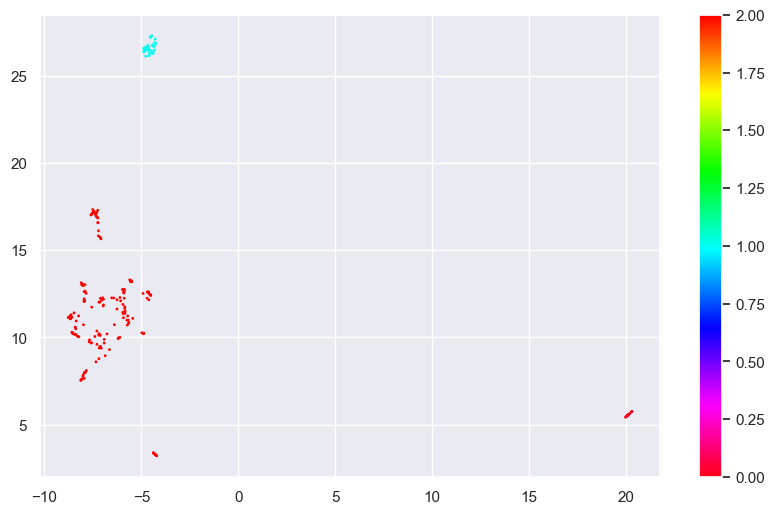

In [131]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 6))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='hsv_r')
plt.colorbar()

In [129]:
result.labels.value_counts()

labels
2    171
1     35
0     16
Name: count, dtype: int64

In [132]:
result["doc"] = docs

In [135]:
import pprint
result_group = result.groupby(["labels"])

for group in result_group:
    pprint.pp(group[:7])

((0,),
              x         y  labels    doc
22   20.129194  5.585847       0  None.
25   20.059959  5.518970       0  None.
26   20.049404  5.508464       0  None.
29   20.125473  5.583998       0  None.
31   20.091196  5.550883       0  None.
89   20.136669  5.594844       0   none
90   20.149569  5.608084       0   none
93   20.090139  5.548686       0   none
205  19.967394  5.426435       0   NONE
206  20.302048  5.758647       0   NONE
208  20.276587  5.731640       0   NONE
209  20.078604  5.537003       0   NONE
211  20.019747  5.478350       0   none
212  20.186789  5.644836       0   none
213  20.283237  5.740721       0   none
214  19.998699  5.457319       0   none)
((1,),
             x          y  labels  \
19  -4.445347  26.367538       1   
21  -4.396762  26.272999       1   
24  -4.854677  26.386787       1   
32  -4.795801  26.519638       1   
33  -4.586792  26.293081       1   
34  -4.598637  26.446922       1   
35  -4.457653  26.356956       1   
36  -4.624772  

In [137]:
other_docs = list(result_group)[2][1]
other_docs

,x,y,labels,doc
0,-5.847370,11.402496,2,Laptop to learn
1,-5.958066,11.442875,2,I don't have textbooks and computer to study
2,-7.136002,15.758123,2,Money to buy food sometimes at school
3,-7.923913,12.099750,2,Lack of financial support.
4,-8.406948,10.596602,2,Our family financial problem.
...,...,...,...,...
217,-4.898626,10.234656,2,Shyness
218,-4.897805,10.234716,2,Shyness
219,-4.896956,10.233042,2,Shyness
220,-4.895079,10.232985,2,Shyness


In [138]:
other_docs = other_docs.reset_index()
other_docs

,index,x,y,labels,doc
0,0,-5.847370,11.402496,2,Laptop to learn
1,1,-5.958066,11.442875,2,I don't have textbooks and computer to study
2,2,-7.136002,15.758123,2,Money to buy food sometimes at school
3,3,-7.923913,12.099750,2,Lack of financial support.
4,4,-8.406948,10.596602,2,Our family financial problem.
...,...,...,...,...,...
166,217,-4.898626,10.234656,2,Shyness
167,218,-4.897805,10.234716,2,Shyness
168,219,-4.896956,10.233042,2,Shyness
169,220,-4.895079,10.232985,2,Shyness


In [139]:
corpus_group3 = [clean(doc) for doc in other_docs.doc if doc == doc]
docs_group3 = [doc for doc in other_docs.doc if doc == doc]
embeddings_group3 = embedder.encode(corpus_group3)

In [140]:
umap_embeddings_group3 = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings_group3)

cluster_group3 = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings_group3)

In [142]:
# Prepare data
umap_data_group3 = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings_group3)
result_group3 = pd.DataFrame(umap_data_group3, columns=['x', 'y'])
result_group3['labels'] = cluster_group3.labels_

In [144]:
result_group3["doc"] = other_docs.doc

In [146]:
result_group3_by = result_group3.groupby(["labels"])

for group in result_group3_by:
    pprint.pp(group[1].head(10))

             x         y  labels                                 doc
58    9.105601  5.143815      -1                             nothing
65   13.608582  6.814736      -1                            SICKNESS
108   9.136287  5.175397      -1  Not something that am thinking of 
112  13.577789  6.774077      -1                      Am always sick
119   9.294466  5.332670      -1                             Nothing
120   9.213300  5.252331      -1               Nothing, All is well.
123   9.257714  5.296208      -1              Nothing , All is well.
125   9.479610  5.479420      -1                    No, All is well.
135  13.531935  6.703761      -1                              Health
141  13.560398  6.786085      -1                            Sickness
             x         y  labels  \
21   15.059145  4.294240       0   
24   15.164438  4.154832       0   
95   15.199655  3.840728       0   
96   15.475784  4.019648       0   
97   15.222965  3.868394       0   
99   15.159020  4.004007 

# Organize Problem Topics

In [74]:
colnames = [('others', "Nothing"), ('feeling_sad', "No"), ('help_needed', None), ('biggest_problem', "No Problems")]
corr_questions = ["Is there anything else you would like us to know? ", 
                  "Have you ever felt so sad or lonely that you wanted to hurt yourself? What do you need right now that you don’t have?",
                 "How can I help you going forward?", "What’s the biggest problem that you’re facing right now?"]

In [130]:
def reorganize_labels(s):
    s_l = s.split(" ")
    new_l = []
    for i, word in enumerate(s_l):
        if (i+1)%6 == 0:
            new_l.extend(["\n", word])
        else:
            new_l.append(word)
    return " ".join(new_l)

In [185]:
def produce_graph(colname_and_no_cat, question, i, df):
    colname = colname_and_no_cat[0]
    no_cat = colname_and_no_cat[1]
    df_col = pd.read_csv(f"analyzed_results_{colname}.csv")
    total_responses = df.shape[0]
    value_counts = df_col[f"{colname}_category"].value_counts()
    if no_cat:
        value_counts[no_cat] += total_responses - df_col.shape[0]
        value_counts = value_counts.rename({no_cat:f"{no_cat}/NA"})
    for index_label in value_counts.index:
        if index_label is not no_cat:
            value_counts = value_counts.rename({index_label:reorganize_labels(index_label)})
    
    title = question
    fontsize = 8.5
    if i == 1:
        fontsize = 7.5

    x = [round(v/total_responses, 4) for v in value_counts.values]
    labels = [round(x_i*100, 2) for x_i in x]

    value_counts_df = pd.DataFrame({"cat":value_counts.index, "percentage":labels})
    value_counts_df.to_csv(f"{colname}_value_counts_percentages.csv", index=False)

    df_groups = df_col.groupby(f"{colname}_category")
    df_col_samples = pd.DataFrame(columns=["doc", f"{colname}_category"])
    for group in df_groups:
        df_sample = group[1].sample(5, replace=True)
        df_col_samples = pd.concat([df_col_samples, df_sample], ignore_index=True)
    df_col_samples.to_csv(f"{colname}_samples.csv", index=False)
    
    sns.set_theme(style="darkgrid")
    plt.figure()
    plt.yticks(fontsize=fontsize)
    ax = sns.barplot(x=x, y = value_counts.index, color="#7A95C4", orient = 'h')
    ax.set_title(f"{title}")
    ax.set_ylabel(None)
    ax.bar_label(container=ax.containers[0], labels=labels, padding=4, color="#3b3b3b")

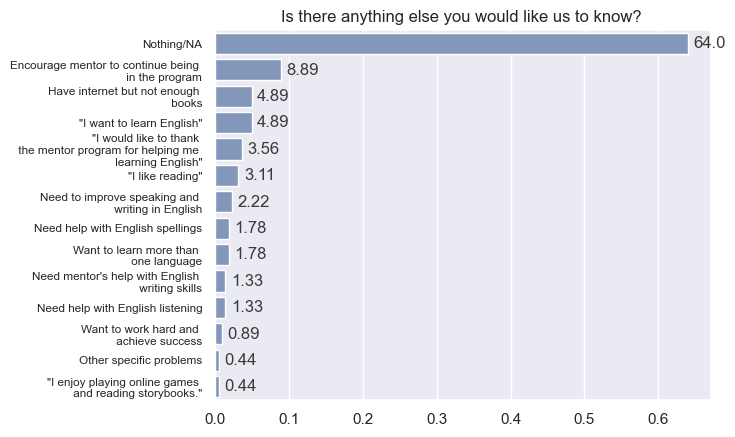

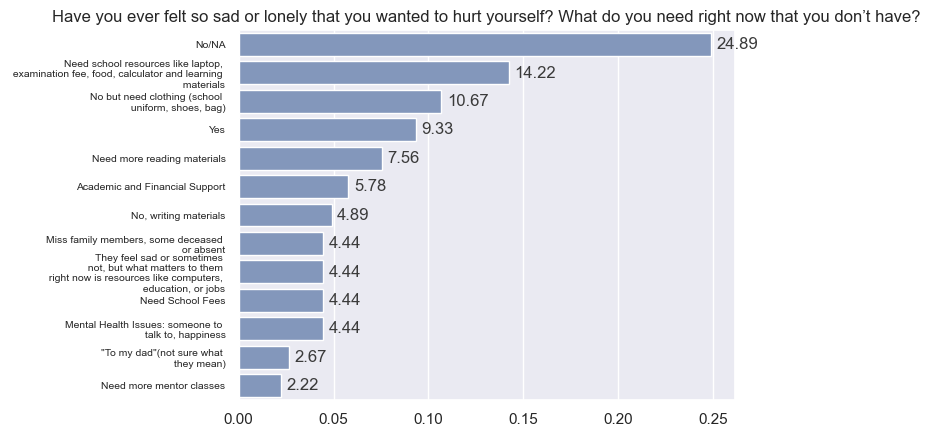

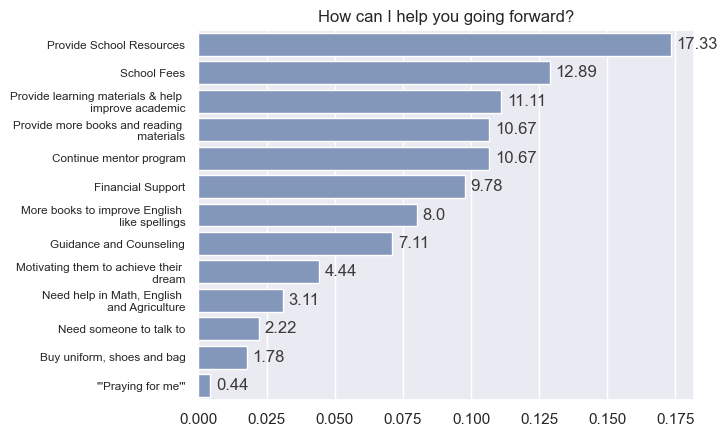

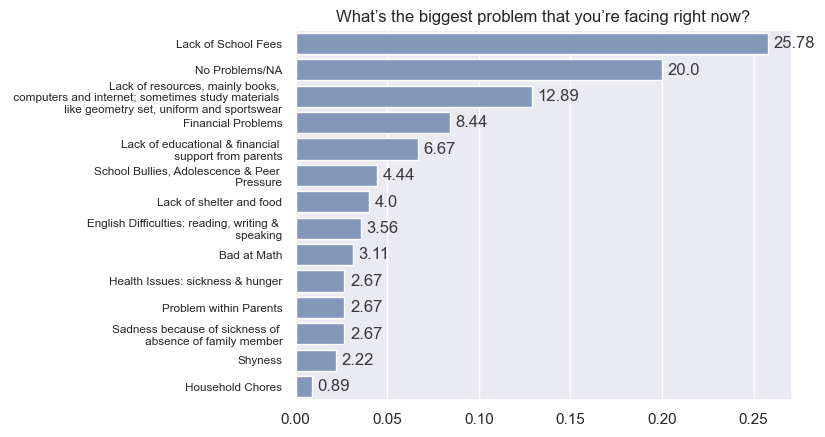

In [186]:
for i, colname in enumerate(colnames):
    produce_graph(colname, corr_questions[i], i, df)